# Process Mining : Order-to-Cash (Trade Payables) Process Discovery

Most companies have information systems that record activities of interests, such as the registration of a new customer, the sale of a product, the approval of a purchase system, the processing of a payment system, etc. All of these activities result in one or more events being recorded in some information system. These events are usually used for record-keeping, accounting, auditing, etc.

Process mining is concerned with using these recorded activities in order to understand how an organisation works. Using process mining, actual sequence of tasks (events) that are performed can be automatically discovered, revealing the behaviour of the recorded process execution. It is therefore possible to compare the actual process with the expected behaviour and deviations can be detected. This can lead to identification of process diagnostics and preventive action for potential risks and fraud.

Order-to-cash process is the process starts when a company receiving a customer's order up until those goods are issued and payment is received. The outstanding amount receivable is what is regularly known as trade receivables. The order-to-cash process is recognised as one of the most important processes within a company because it provides core resources for running a business on a daily basis and strongly influences the availability of cash for daily operations.

This notebook will look at how process mining can be used to understand the order-to-cash process of a company. This was done using python and various libraries such as pandas (for analysing the data) and graphviz (for visualizing the discovered process).

The dataset was gotten from https://github.com/IBM/processmining. IBM Github repository for process mining.

The order request (event log) is structured as follows. There are a total of 33,196 order requests (cases). In these cases, there are 196,832 events relating to 18 activities performed by 74 users (72 human users and 2 system automatic job). 

For each order (case) the following attributes are recorded:

- 1 Key: The purchase ID,
- 2 Date: The date and time of an event,
- 3 User: The user resource involved in the process,
- 4 Activity: The activity performed in the process,
- 5 Role: The role of the user,
- 6 Product_hierarchy: A text explaining the hierachy of a purchase item,
- 7 NetValue: The value of a purchase item,
- 8 Company: The company ID,
- 9 Delivery: The delivery ID of this item,
- 10 Delivery_Date: The delivery date of this item,
- 11 Good_Issue_Date: The date goods was issued. However this was derived,
- 12 Difference: The time difference (in seconds) between the delivery date and goods issue date,
- 13 Customer: The customer id,
- 14 OrderType: Type of order,
- 15 clientCode: The client code,
- 16 NotInTime: Indicating if an order was delayed or not where 1 = delayed and 0 = on time,
- 17 Execution_Status: Indicating if it was a manual or automatic task,
- 18 User_Type: Indicating if the task was done by a human or robot,
- 19 Change_Status: Change indicator,
- 20 ID_Change_Status: The change_status ID,
- 21 Block_Status: Block indicator,
- 22 ID_Block_Status: The Block_Status ID,


In [1]:
import pandas as pd
import numpy as np
import graphviz

In [2]:
df = pd.read_csv("o2c_final.csv", thousands='.', decimal=',')
df

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaN,...,IN TIME,0,14520348000000,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaN,...,IN TIME,0,14520348000000,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08 00:00:00,...,IN TIME,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08 00:00:00,...,IN TIME,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaN,...,IN TIME,0,14527260000000,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19 00:00:00,...,DELAYED,0,14978200000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaN,...,DELAYED,0,14993784000000,Manual,Human,no change,Without change,no block,With block,LocalFamily13
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaN,...,DELAYED,0,14993784000000,Manual,Human,no change,Without change,block,With block,LocalFamily13
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07 00:00:00,...,DELAYED,0,14993800000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196832 entries, 0 to 196831
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                196832 non-null  object 
 1   Date               196832 non-null  object 
 2   User               196832 non-null  object 
 3   Activity           196832 non-null  object 
 4   Role               196832 non-null  object 
 5   Product_hierarchy  196832 non-null  object 
 6   NetValue           196832 non-null  int64  
 7   Company            196832 non-null  int64  
 8   Delivery           93762 non-null   float64
 9   Delivery_Date      93762 non-null   object 
 10  Good_Issue_Date    196832 non-null  int64  
 11  Difference         93762 non-null   float64
 12  Customer           196832 non-null  object 
 13  OrderType          196832 non-null  object 
 14  clientCode         196832 non-null  object 
 15  NotInTime          196832 non-null  int64  
 16  De

## Process Discovery

First, let us have a look at the order-to-cash process at a high level. To do this, need to look at each order and understand how the events were performed. We will start by sorting the event log by the order number and date. This will help in sorting various activities done in order according to when they were performed (date/time).

In [4]:
df['Date'] = pd.to_datetime(df['Date'],  dayfirst=True)
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'],  dayfirst=True)
df = df.sort_values(by=['Key', 'Date'], ascending=True).reset_index(drop=True)
df

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,IN TIME,0,14520348000000,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,IN TIME,0,14520348000000,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,IN TIME,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,IN TIME,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,IN TIME,0,14527260000000,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,DELAYED,0,14978200000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,DELAYED,0,14993784000000,Manual,Human,no change,Without change,no block,With block,LocalFamily13
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,DELAYED,0,14993784000000,Manual,Human,no change,Without change,block,With block,LocalFamily13
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,DELAYED,0,14993800000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13


After sorting these order requests, we want to how these activities were performed (from the first activity until the last activity) for each order request and extract only the columns needed for the process discovery. This will also be useful in carrying out our variants analysis below.

PS: I prefer making copies of my dataframe because it makes me not run the previous code cell all over again.

In [5]:
final_df_2 = df.copy()
final_df_2['Count'] = final_df_2.groupby('Key').cumcount()+1
final_df_2

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,no block,With block,NaN,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,block,With block,NaN,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,0,14527260000000,Manual,Human,no change,Without change,no block,With block,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,0,14978200000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,no block,With block,LocalFamily13,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,block,With block,LocalFamily13,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,0,14993800000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13,3


In [6]:
pflow = final_df_2.copy()
pflow = pflow[['Key','Date','User','Activity','Count']]
pflow

,Key,Date,User,Activity,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,1
...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,3


In [7]:
pflow['Activity'].value_counts()

Delivery                            46881
Good Issue                          46881
Line Creation                       33196
LgstCheckOnConfDat Removed          31458
Header Block Removed                20367
Sched.Line Changed Delivery Date    10611
Document released for credit         3366
Address missing Block Removed         866
Address missing Block Set             842
LgstCheckOnConfDat Set                730
CTR Block Removed                     634
Sched.Line Block Removed              509
Document blocked for credit           263
Header Block Set                      221
Sched.Line Block Set                    3
Special test Block Removed              2
Special test Block Set                  1
CTR Block Set                           1
Name: Activity, dtype: int64

In [8]:
# Generating the start and end activities
activities_list = pflow.copy()
activities_list = activities_list.pivot(index='Key', columns='Count', values='Activity')

# Get the last activity per order
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)

# Get the first activity per order
activities_list['First Activity'] = activities_list[1]
activities_list

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Last Activity,First Activity
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
7080000990_390,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
7080000997_10,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation


In [9]:
# Start Activities
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
start_act

,Start,First Activity,Weight
0,Start,Line Creation,33196


In [10]:
# End Activities
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
end_act

,Last Activity,End,Weight
0,Good Issue,End,33196


### Process Discovery
To discover the process as a whole, we have to carry out some analysis.
For each case, we have to understand the flow of the activities i.e., what activity started and what was the next activity that followed until the order is completed. How did we do this?
- We got all the rows in the dataframe except the last row (sort1). 
- We got all the row in the dataframe except the first one (sort2). 
- After this, we concatenated the two dataframe together side by side (sortnew)
- Finally, we eliminated those rows where the Key1 and Key2 did not match (sortnew1) because they do not relate to the same order. 

Getting the data in this format was easier to visualise using the graphviz library.

In [11]:
# Process details
new_df_1 = pflow.copy()
new_df_1 = new_df_1[['Key','Date','Activity','User']]
sort1 = new_df_1.iloc[:-1,:].reset_index(drop=True)
sort2 = new_df_1.iloc[1:,:].reset_index(drop=True)
sortnew = pd.concat([sort1,sort2],axis=1)
sortnew.columns = ['Key1','startTime','startActivity','startUser','Key2','endTime','endActivity','endUser']

sortnew1 = sortnew.copy()
sortnew1['Comparison'] = sortnew1.apply(lambda x: True if x['Key1'] == x['Key2'] else False,axis=1)
sortnew1 = sortnew1[sortnew1['Comparison'] == True].reset_index(drop=True)
sortnew1

,Key1,startTime,startActivity,startUser,Key2,endTime,endActivity,endUser,Comparison
0,0009000481_10,2016-01-05 17:10:00,Line Creation,User9,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,True
1,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,0009000481_10,2016-01-06 18:05:04,Delivery,User61,True
2,0009000481_10,2016-01-06 18:05:04,Delivery,User61,0009000481_10,2016-01-07 23:59:59,Good Issue,User61,True
3,0009000485_10,2016-01-14 19:07:11,Line Creation,User16,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,True
4,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,0009000485_10,2016-01-14 22:54:30,LgstCheckOnConfDat Removed,User9,True
...,...,...,...,...,...,...,...,...,...
163631,7080001003_10,2017-06-19 23:07:17,Header Block Removed,User19,7080001003_10,2017-06-20 17:16:20,Delivery,User60,True
163632,7080001003_10,2017-06-20 17:16:20,Delivery,User60,7080001003_10,2017-06-22 23:59:59,Good Issue,User60,True
163633,7080001018_40,2017-07-07 15:37:43,Line Creation,User22,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,True
163634,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,7080001018_40,2017-07-11 15:06:56,Delivery,User60,True


The similar start and end activities were then grouped together and counted the number of times they appear (Count column)

In [12]:
sortnew2 = sortnew1[['Key1', 'startActivity','endActivity']]
countsort2 = sortnew2.groupby(['startActivity','endActivity'], sort=False).size()
newcountsort1 = countsort2.to_frame(name='Count').reset_index()
newcountsort1

,startActivity,endActivity,Count
0,Line Creation,LgstCheckOnConfDat Removed,13239
1,LgstCheckOnConfDat Removed,Delivery,25657
2,Delivery,Good Issue,35141
3,Line Creation,LgstCheckOnConfDat Set,77
4,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,536
...,...,...,...
116,Document blocked for credit,Delivery,15
117,LgstCheckOnConfDat Set,Document blocked for credit,1
118,Document blocked for credit,LgstCheckOnConfDat Removed,1
119,Address missing Block Set,LgstCheckOnConfDat Set,2


In [13]:
graph_count = pflow.copy()
graph_count = graph_count['Activity'].value_counts().to_frame().reset_index().rename(columns={'index':'Activity','Activity':'Count'})
graph_count

,Activity,Count
0,Delivery,46881
1,Good Issue,46881
2,Line Creation,33196
3,LgstCheckOnConfDat Removed,31458
4,Header Block Removed,20367
5,Sched.Line Changed Delivery Date,10611
6,Document released for credit,3366
7,Address missing Block Removed,866
8,Address missing Block Set,842
9,LgstCheckOnConfDat Set,730


The process is then shown below with the number of time these activities are done.

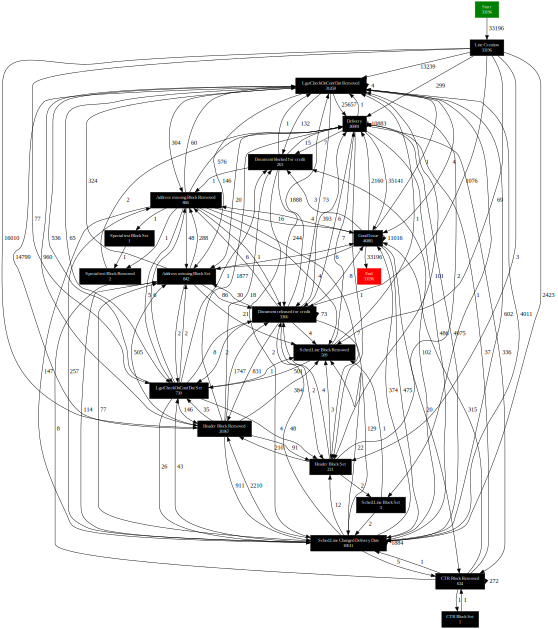

In [14]:
h = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
h.attr('node', shape='box')
h.attr(rankdir='TB')
h.attr(nodesep='0.1')
h.attr(size='7.75,10.25')

max_node = 5
max_case_id = newcountsort1['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    h.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
    h.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    h.edge(str(row["Start"]), str(row["First Activity"]), label="  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in newcountsort1.iterrows():
    h.node(row['startActivity'],label=row['startActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['startActivity']]['Count'].sum()))
    h.node(row['endActivity'],label=row['endActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['endActivity']]['Count'].sum()))

for index, row in newcountsort1.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    h.edge(str(row["startActivity"]), str(row["endActivity"]), label= "  " + count)
#            , penwidth=str(int(row["Count"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    h.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['Last Activity']]['Count'].sum()))
    h.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()),  _attributes={'color':'red', 'fontcolor':'white'})

for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    h.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

# h.view()
h

In [15]:
sortnewtimetest = sortnew1.copy()
sortnewtimetest['Duration'] = sortnewtimetest['endTime'] - sortnewtimetest['startTime']

sortnewtimetest = sortnewtimetest[['startActivity','endActivity','Duration']]
sortnewtimetest['Duration'] = sortnewtimetest['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnewtimetest = sortnewtimetest.groupby(['startActivity','endActivity'],sort=False).agg({'Duration': ['mean'],'startActivity':['count']}).reset_index()
sortnewtimetest.columns = ['startActivity','endActivity', 'Duration', 'Count']
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration']/86400,0).astype(int)

sortnewtimetest

,startActivity,endActivity,Duration,Count
0,Line Creation,LgstCheckOnConfDat Removed,1,13239
1,LgstCheckOnConfDat Removed,Delivery,29,25657
2,Delivery,Good Issue,2,35141
3,Line Creation,LgstCheckOnConfDat Set,0,77
4,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,2,536
...,...,...,...,...
116,Document blocked for credit,Delivery,13,15
117,LgstCheckOnConfDat Set,Document blocked for credit,0,1
118,Document blocked for credit,LgstCheckOnConfDat Removed,0,1
119,Address missing Block Set,LgstCheckOnConfDat Set,0,2


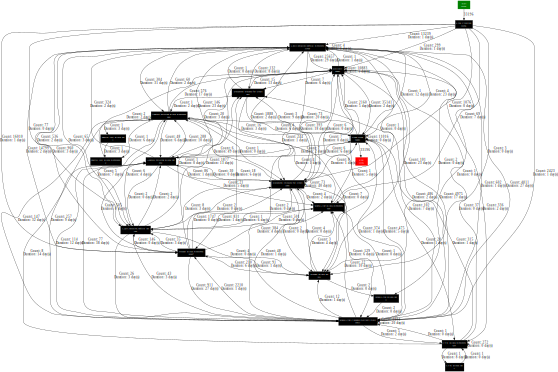

In [16]:
h = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
h.attr('node', shape='box')
h.attr(rankdir='TB')
h.attr(nodesep='0.1')
h.attr(size='7.75,10.25')

max_node = 5
max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    h.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
    h.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    h.edge(str(row["Start"]), str(row["First Activity"]), label="  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in sortnewtimetest.iterrows():
    h.node(row['startActivity'],label=row['startActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['startActivity']]['Count'].sum()))
    h.node(row['endActivity'],label=row['endActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['endActivity']]['Count'].sum()))

for index, row in sortnewtimetest.iterrows():
    startevent, endevent, duration, count = [str(i) for i in row]
    h.edge(str(row["startActivity"]), str(row["endActivity"]), label= 'Count: '+ count + '\nDuration: ' + duration+ " day(s)")
#            , penwidth=str(int(row["Count"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    h.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['Last Activity']]['Count'].sum()))
    h.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()),  _attributes={'color':'red', 'fontcolor':'white'})

for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    h.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

# h.view()
h

In [17]:
duratn_det = sortnew1.copy()
duratn_det['Duration'] = duratn_det['endTime'] - duratn_det['startTime']
duratn_det['Duration'] = duratn_det['Duration'].apply(lambda x: round(x.total_seconds(),0))
duratn_det['Duration'] = round(duratn_det['Duration']/86400,0).astype(int)
duratn_det

,Key1,startTime,startActivity,startUser,Key2,endTime,endActivity,endUser,Comparison,Duration
0,0009000481_10,2016-01-05 17:10:00,Line Creation,User9,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,True,1
1,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,0009000481_10,2016-01-06 18:05:04,Delivery,User61,True,0
2,0009000481_10,2016-01-06 18:05:04,Delivery,User61,0009000481_10,2016-01-07 23:59:59,Good Issue,User61,True,1
3,0009000485_10,2016-01-14 19:07:11,Line Creation,User16,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,True,0
4,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,0009000485_10,2016-01-14 22:54:30,LgstCheckOnConfDat Removed,User9,True,0
...,...,...,...,...,...,...,...,...,...,...
163631,7080001003_10,2017-06-19 23:07:17,Header Block Removed,User19,7080001003_10,2017-06-20 17:16:20,Delivery,User60,True,1
163632,7080001003_10,2017-06-20 17:16:20,Delivery,User60,7080001003_10,2017-06-22 23:59:59,Good Issue,User60,True,2
163633,7080001018_40,2017-07-07 15:37:43,Line Creation,User22,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,True,0
163634,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,7080001018_40,2017-07-11 15:06:56,Delivery,User60,True,4


In [18]:
# duratn_det.to_csv('Timing_details.csv', index=False)

## Variant Analysis

A process variant is a unique path from the very begining to the very end of the process. Variants shows us how we underestimate the complexity in our processes. 
- The frequency of a variant tells you how frequent a specific execution pattern is and lets you distinguish main stream variants from outliers and exceptions
- The total number of variants alone tells you how much variation you have in your process. Following standard procedures is crucial to deliver constant quality and efficient services

By understanding the variants in your process, you can find out which patterns deliver a good (or bad) performance. You can then actively promote the well-performing variants for a better and more consistent process performance.

In [19]:
# Variants
variants = pflow.copy()
variants = variants.pivot(index='Key', columns='Count', values='Activity')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
variants

Count,1,2,3,4,5,6,7,8,9,10,...,252,253,254,255,256,257,258,259,260,Trace
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Set,LgstCheck..."
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."
7080000990_390,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."
7080000997_10,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."


In [20]:
variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
variants_num

Count,Variants,Trace,No of occurance
0,1,"Line Creation,LgstCheckOnConfDat Removed,Deliv...",9925
1,2,"Line Creation,Header Block Removed,LgstCheckOn...",8971
2,3,"Line Creation,Header Block Removed,LgstCheckOn...",1122
3,4,"Line Creation,Header Block Removed,Document re...",933
4,5,"Line Creation,LgstCheckOnConfDat Removed,Heade...",749
...,...,...,...
1470,1471,"Line Creation,Header Block Removed,LgstCheckOn...",1
1471,1472,"Line Creation,Header Block Removed,LgstCheckOn...",1
1472,1473,"Line Creation,Header Block Removed,LgstCheckOn...",1
1473,1474,"Line Creation,Header Block Removed,LgstCheckOn...",1


From the above, we can see that there are 1,475 variants of this process. The first 5 variants accounts for about 65% of the overall process.

In [21]:
variants_2 = variants.copy()
variants_2 = variants_2.reset_index()
variants_2 = variants_2.merge(variants_num, on='Trace', how='left')
variants_2 = variants_2[['Key','Variants']]
variants_2

Count,Key,Variants
0,0009000481_10,1
1,0009000485_10,759
2,0009000486_10,1
3,0009000487_10,1
4,0009000487_100,1
...,...,...
33191,7080000979_74,11
33192,7080000990_390,11
33193,7080000997_10,11
33194,7080001003_10,11


In [22]:
list(variants_num['Trace'][:5])

['Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Sched.Line Changed Delivery Date,Delivery,Good Issue',
 'Line Creation,Header Block Removed,Document released for credit,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,LgstCheckOnConfDat Removed,Header Block Removed,Delivery,Good Issue']

## Timing Details

Here, we look at the timing of each order to determine how long it takes to complete the order. 

There is not enough detail to determine the standard time it takes to complete an order. To determine this, for each product hierarchy we will determine the median time it takes to complete an order. Any order completed above the median time will be regarded as a late order. (This is visualised in Microsoft PowerBI)

In [64]:
timing_detils = pflow.copy()
timing_detils = timing_detils.pivot(index='Key',columns='Count', values='Date')
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,251,252,253,254,255,256,257,258,259,260
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [24]:
timing_detils['Max'] = timing_detils.apply(max, axis=1)
timing_detils['Case Duration'] = timing_detils['Max'] - timing_detils[1]
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Max,Case Duration
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-07 23:59:59,2 days 06:49:59
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-15 23:59:59,1 days 04:52:48
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-18 23:59:59,0 days 08:32:22
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7 days 03:41:14
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7 days 03:41:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-02 23:59:59,23 days 05:46:41
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-07-05 23:59:59,35 days 02:22:13
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-26 23:59:59,17 days 06:36:15


In [25]:
timing_detils['Case Duration'] = timing_detils['Case Duration'].apply(lambda x: round(x.total_seconds(),0))
timing_detils['Case Duration'] = round(timing_detils['Case Duration']/86400,2)
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Max,Case Duration
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-07 23:59:59,2.28
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-15 23:59:59,1.20
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-18 23:59:59,0.36
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7.15
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-02 23:59:59,23.24
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-07-05 23:59:59,35.10
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-26 23:59:59,17.28


In [26]:
max_length = pflow['Count'].max()

In [27]:
timing_detils = timing_detils.drop(variants_col, axis=1)
timing_detils

Count,Max,Case Duration
Key,,
0009000481_10,2016-01-07 23:59:59,2.28
0009000485_10,2016-01-15 23:59:59,1.20
0009000486_10,2016-01-18 23:59:59,0.36
0009000487_10,2016-01-26 23:59:59,7.15
0009000487_100,2016-01-26 23:59:59,7.15
...,...,...
7080000979_74,2017-06-02 23:59:59,23.24
7080000990_390,2017-07-05 23:59:59,35.10
7080000997_10,2017-06-26 23:59:59,17.28


In [28]:
timing_detils_2 = timing_detils.copy()
timing_detils_2 = timing_detils_2.reset_index()
timing_detils_2 = timing_detils_2[['Key','Case Duration']]
timing_detils_2

Count,Key,Case Duration
0,0009000481_10,2.28
1,0009000485_10,1.20
2,0009000486_10,0.36
3,0009000487_10,7.15
4,0009000487_100,7.15
...,...,...
33191,7080000979_74,23.24
33192,7080000990_390,35.10
33193,7080000997_10,17.28
33194,7080001003_10,3.04


In [29]:
final_df_2.head(2)

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,no block,With block,NaN,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,block,With block,NaN,2


In [30]:
with pd.option_context('display.max_rows', None):
  display(final_df_2[final_df_2['Count'] == 1].groupby(['Customer','OrderType','Product_hierarchy']).agg({'Key':['count'],'NetValue':['sum']}))

Key    NetValue
                                                            count         sum
Customer     OrderType            Product_hierarchy                          
Customer 1   US-Free of charge    TLC Optical Cables           46           0
             US-Std. Order        TLC Connectivity            100    22172795
                                  TLC Optical Cables         1350   284228260
Customer 10  US-IC Order Fiber    TLC Optical Fibres         1184  1487157335
Customer 100 US-Free of charge    TLC Optical Cables            2           0
             US-Std. Order        TLC Optical Cables           20      752377
Customer 101 US-Free of charge    TLC Optical Cables            1           0
             US-Return Order      TLC Optical Cables           12     1045665
             US-Std. Order        TLC Optical Cables            9     1725240
Customer 102 US-Std. Order        TLC Optical Cables           22     2230759
Customer 103 US-Std. I/C Order    TLC Optical Cables           13     2039155
Customer 104 US-Std. Order        TLC Optical Cables           48      463280
Customer 105 US-Std. Order        TLC Optical Cables            1      188272
Customer 106 US-Std. Order        TLC Optical Cables            2     1263251
Customer 107 US-Std. Order        TLC Optical Cables            6     3077488
Customer 108 US-Return Order      TLC Optical Cables            1       26376
             US-Std. Order        TLC Optical Cables            7      435404
Customer 109 US-Std. Order        TLC Optical Cables            1        6260
Customer 11  US-Free of charge    TLC Optical Cables           10           0
             US-Std. Order        TLC Optical Cables          354    10054804
Customer 110 US-Return Order      TLC Optical Cables           31      503440
             US-Std. Order        TLC Optical Cables            2     3200534
Customer 111 US-Free of charge    TLC Optical Cables            1           0
             US-Std. Order        TLC Optical Cables            1     4929691
Customer 113 US-Std. Order Fiber  TLC Optical Fibres            2       20000
Customer 114 US-Free of charge    TLC Optical Cables            1           0
             US-Return Order      TLC Optical Cables            3     1053745
             US-Std. Order        TLC Optical Cables           63     7308430
Customer 115 US-Std. Order        TLC Optical Cables            1       75500
Customer 116 US-Std. Order Fiber  TLC Optical Fibres            2       79997
Customer 117 US-Free of charge    TLC Optical Cables            1           0
             US-Std. Order        TLC Optical Cables           15     5776284
Customer 118 US-Std. Order        TLC Optical Cables           36     8142974
Customer 119 US-Free of charge    TLC Optical Cables            1           0
             US-Std. Order        TLC Optical Cables           24    15455708
Customer 12  US-Return Order      TLC Optical Cables            5     1612380
             US-Std. Order        TLC Optical Cables          316   209944662
Customer 120 US-IC Order Fiber    TLC Optical Fibres           22     2398032
Customer 121 US-Std. Order        TLC Optical Cables            7      685927
Customer 122 US-Free of charge    TLC Optical Cables            1           0
             US-Std. Order        TLC Connectivity              3        4200
                                  TLC Optical Cables           13      513777
Customer 123 US-Std. Order        TLC Optical Cables            1       35112
Customer 124 US-Std. Order        TLC Optical Cables            2        9580
Customer 125 US-Std. Order        TLC Optical Cables           31     7602902
Customer 126 US-Std. Order        TLC Optical Cables           33    14633114
Customer 127 US-IC Order Fiber    TLC Optical Fibres           18     4737600
Customer 128 US-Std. Order        TLC Optical Cables           40     9438636
Customer 129 US-Std. Order        TLC Optical Cables            2       18238
Custom

In [31]:
final_df_2.columns

Index(['Key', 'Date', 'User', 'Activity', 'Role', 'Product_hierarchy',
       'NetValue', 'Company', 'Delivery', 'Delivery_Date', 'Good_Issue_Date',
       'Difference', 'Customer', 'OrderType', 'clientCode', 'NotInTime',
       'Delayed', 'PromiseMAD', 'ActualMAD', 'Execution_Status', 'User_Type',
       'Change_Status', 'ID_Change_Status', 'Block_Status', 'ID_Block_Status',
       'Local_Family_code', 'Count'],
      dtype='object')

In [32]:
other_info = final_df_2.copy()
other_info = other_info[['Key', 'Product_hierarchy','NetValue', 'Company', 'Customer', 'OrderType','Count']]
other_info = other_info[other_info['Count'] == 1].reset_index(drop=True)
other_info = other_info.merge(timing_detils_2,on='Key',how='outer')
other_info = other_info.merge(variants_2,on='Key',how='outer')
other_info

,Key,Product_hierarchy,NetValue,Company,Customer,OrderType,Count,Case Duration,Variants
0,0009000481_10,TLC Optical Fibres,69200,767,Customer 260,US-Internal Transfer,1,2.28,1
1,0009000485_10,TLC Optical Fibres,73525,767,Customer 260,US-Internal Transfer,1,1.20,759
2,0009000486_10,TLC Optical Fibres,73525,767,Customer 260,US-Internal Transfer,1,0.36,1
3,0009000487_10,TLC Optical Fibres,28560,767,Customer 260,US-Internal Transfer,1,7.15,1
4,0009000487_100,TLC Optical Fibres,28560,767,Customer 260,US-Internal Transfer,1,7.15,1
...,...,...,...,...,...,...,...,...,...
33191,7080000979_74,TLC Optical Cables,87160,767,Customer 247,US-Return Order,1,23.24,11
33192,7080000990_390,TLC Optical Cables,1315062,767,Customer 40,US-Return Order,1,35.10,11
33193,7080000997_10,TLC Optical Cables,649949,767,Customer 14,US-Return Order,1,17.28,11
33194,7080001003_10,TLC Optical Cables,499130,767,Customer 88,US-Return Order,1,3.04,11


In [33]:
# other_info.to_csv('o2c_other_info.csv', index=False)

In [34]:
newcountsort1[newcountsort1['startActivity'] == 'CTR Block Set']

,startActivity,endActivity,Count
83,CTR Block Set,CTR Block Removed,1


In [35]:
pflow['Activity'].value_counts()

Delivery                            46881
Good Issue                          46881
Line Creation                       33196
LgstCheckOnConfDat Removed          31458
Header Block Removed                20367
Sched.Line Changed Delivery Date    10611
Document released for credit         3366
Address missing Block Removed         866
Address missing Block Set             842
LgstCheckOnConfDat Set                730
CTR Block Removed                     634
Sched.Line Block Removed              509
Document blocked for credit           263
Header Block Set                      221
Sched.Line Block Set                    3
Special test Block Removed              2
Special test Block Set                  1
CTR Block Set                           1
Name: Activity, dtype: int64

## Cases with duplicate activities

In [36]:
duplicate_activities = final_df_2.copy()
duplicate_activities

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,no block,With block,NaN,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,0,14520348000000,Manual,Human,no change,Without change,block,With block,NaN,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,0,14520300000000,Automatic,Robot,no change,Without change,no block,With block,NaN,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,0,14527260000000,Manual,Human,no change,Without change,no block,With block,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,0,14978200000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,no block,With block,LocalFamily13,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,block,With block,LocalFamily13,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,0,14993800000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13,3


In [37]:
duplicate_activities['duplicates_id'] = duplicate_activities.groupby(["Key", "Activity"]).transform('cumcount')
duplicate_activities['Duplicate_or_not'] = duplicate_activities.apply(lambda x: 'Non_Duplicate' if x['duplicates_id'] == 0 else 'Duplicate',axis=1)
duplicate_activities

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count,duplicates_id,Duplicate_or_not
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Manual,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Manual,Human,no change,Without change,block,With block,NaN,2,0,Non_Duplicate
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Automatic,Robot,no change,Without change,no block,With block,NaN,3,0,Non_Duplicate
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Automatic,Robot,no change,Without change,no block,With block,NaN,4,0,Non_Duplicate
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,Manual,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,4,0,Non_Duplicate
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Manual,Human,no change,Without change,no block,With block,LocalFamily13,1,0,Non_Duplicate
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Manual,Human,no change,Without change,block,With block,LocalFamily13,2,0,Non_Duplicate
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13,3,0,Non_Duplicate


In [38]:
duplicate_activities[duplicate_activities['Duplicate_or_not'] == 'Duplicate']['Activity'].value_counts()

Delivery                            13685
Good Issue                          13685
Sched.Line Changed Delivery Date     3259
CTR Block Removed                     342
Header Block Removed                  161
Document released for credit          156
LgstCheckOnConfDat Removed            124
Address missing Block Set              62
Address missing Block Removed          62
Header Block Set                       14
LgstCheckOnConfDat Set                  5
Sched.Line Block Removed                2
Name: Activity, dtype: int64

In [39]:
rework_cases = duplicate_activities.copy()
rework_cases = rework_cases[['Key','Duplicate_or_not']]
rework_cases = rework_cases.drop_duplicates()
rework_cases = rework_cases[rework_cases['Duplicate_or_not'] == 'Duplicate'].reset_index(drop=True)
rework_cases = rework_cases.rename(columns={'Duplicate_or_not':'Reworked_cases'})
rework_cases

,Key,Reworked_cases
0,0009000489_30,Duplicate
1,0009000491_10,Duplicate
2,0009000491_100,Duplicate
3,0009000491_110,Duplicate
4,0009000491_120,Duplicate
...,...,...
6286,7020052443_70,Duplicate
6287,7020052443_80,Duplicate
6288,7020052443_90,Duplicate
6289,7020052465_20,Duplicate


In [40]:
final_df_3 = duplicate_activities.merge(rework_cases, on='Key',how='left')
final_df_3['Reworked_cases'] = final_df_3['Reworked_cases'].fillna('No_Duplicate')
final_df_3

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count,duplicates_id,Duplicate_or_not,Reworked_cases
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Human,no change,Without change,block,With block,NaN,2,0,Non_Duplicate,No_Duplicate
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Robot,no change,Without change,no block,With block,NaN,3,0,Non_Duplicate,No_Duplicate
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Robot,no change,Without change,no block,With block,NaN,4,0,Non_Duplicate,No_Duplicate
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,Robot,no change,Without change,no block,With block,LocalFamily77,4,0,Non_Duplicate,No_Duplicate
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Human,no change,Without change,no block,With block,LocalFamily13,1,0,Non_Duplicate,No_Duplicate
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Human,no change,Without change,block,With block,LocalFamily13,2,0,Non_Duplicate,No_Duplicate
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,Robot,no change,Without change,no block,With block,LocalFamily13,3,0,Non_Duplicate,No_Duplicate


In [41]:
final_df_3[final_df_3['Reworked_cases'] == 'Duplicate']['Product_hierarchy'].value_counts()

TLC Optical Cables           54618
TLC Optical Fibres           11513
TLC Connectivity               461
TLC Optical Ground Cables       64
Name: Product_hierarchy, dtype: int64

In [42]:
final_df_3

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count,duplicates_id,Duplicate_or_not,Reworked_cases
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,Human,no change,Without change,block,With block,NaN,2,0,Non_Duplicate,No_Duplicate
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Robot,no change,Without change,no block,With block,NaN,3,0,Non_Duplicate,No_Duplicate
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,Robot,no change,Without change,no block,With block,NaN,4,0,Non_Duplicate,No_Duplicate
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,Robot,no change,Without change,no block,With block,LocalFamily77,4,0,Non_Duplicate,No_Duplicate
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Human,no change,Without change,no block,With block,LocalFamily13,1,0,Non_Duplicate,No_Duplicate
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,Human,no change,Without change,block,With block,LocalFamily13,2,0,Non_Duplicate,No_Duplicate
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,Robot,no change,Without change,no block,With block,LocalFamily13,3,0,Non_Duplicate,No_Duplicate


In [43]:
final_df_3[final_df_3['Key']== '0009000491_20']

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count,duplicates_id,Duplicate_or_not,Reworked_cases
231,0009000491_20,2016-01-20 20:48:33,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,1111525,767,NaN,NaT,...,Human,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,Duplicate
232,0009000491_20,2016-01-20 22:59:00,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,1111525,767,NaN,NaT,...,Human,no change,Without change,block,With block,NaN,2,0,Non_Duplicate,Duplicate
233,0009000491_20,2016-02-01 17:21:25,User60,Delivery,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,3,0,Non_Duplicate,Duplicate
234,0009000491_20,2016-02-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,4,0,Non_Duplicate,Duplicate
235,0009000491_20,2016-02-10 18:12:06,User61,Delivery,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,5,1,Duplicate,Duplicate
236,0009000491_20,2016-02-10 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,6,1,Duplicate,Duplicate
237,0009000491_20,2016-02-15 16:25:03,User61,Delivery,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,7,2,Duplicate,Duplicate
238,0009000491_20,2016-02-15 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,Robot,no change,Without change,no block,With block,NaN,8,2,Duplicate,Duplicate


In [45]:
# final_df_3.to_csv('o2c_final_2.csv', index=False)

## Deviations

Here, we looked at those activities which we feel deviated from the expected process.

In [46]:
final_df_3['Activity'].value_counts()

Delivery                            46881
Good Issue                          46881
Line Creation                       33196
LgstCheckOnConfDat Removed          31458
Header Block Removed                20367
Sched.Line Changed Delivery Date    10611
Document released for credit         3366
Address missing Block Removed         866
Address missing Block Set             842
LgstCheckOnConfDat Set                730
CTR Block Removed                     634
Sched.Line Block Removed              509
Document blocked for credit           263
Header Block Set                      221
Sched.Line Block Set                    3
Special test Block Removed              2
Special test Block Set                  1
CTR Block Set                           1
Name: Activity, dtype: int64

In [47]:
sortnew1.pivot_table(index='startActivity', columns='endActivity', values='Key1',aggfunc='count').fillna(0)

endActivity,Address missing Block Removed,Address missing Block Set,CTR Block Removed,CTR Block Set,Delivery,Document blocked for credit,Document released for credit,Good Issue,Header Block Removed,Header Block Set,LgstCheckOnConfDat Removed,LgstCheckOnConfDat Set,Sched.Line Block Removed,Sched.Line Block Set,Sched.Line Changed Delivery Date,Special test Block Removed,Special test Block Set
startActivity,,,,,,,,,,,,,,,,,
Address missing Block Removed,0.0,48.0,0.0,0.0,576.0,0.0,1.0,16.0,0.0,7.0,60.0,5.0,4.0,0.0,147.0,1.0,1.0
Address missing Block Set,288.0,0.0,0.0,0.0,0.0,0.0,86.0,7.0,0.0,0.0,324.0,2.0,21.0,0.0,114.0,0.0,0.0
CTR Block Removed,0.0,8.0,272.0,1.0,37.0,0.0,0.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CTR Block Set,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Delivery,0.0,20.0,336.0,0.0,10883.0,7.0,6.0,35141.0,0.0,1.0,1.0,0.0,0.0,0.0,486.0,0.0,0.0
Document blocked for credit,1.0,0.0,0.0,0.0,15.0,0.0,244.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
Document released for credit,6.0,30.0,0.0,0.0,393.0,0.0,73.0,8.0,831.0,2.0,1888.0,2.0,4.0,0.0,129.0,0.0,0.0
Good Issue,4.0,6.0,20.0,0.0,2160.0,3.0,0.0,11016.0,0.0,0.0,1.0,0.0,0.0,0.0,475.0,0.0,0.0
Header Block Removed,0.0,505.0,0.0,0.0,1877.0,18.0,1747.0,0.0,0.0,91.0,14799.0,35.0,384.0,0.0,911.0,0.0,0.0


In [50]:
variants_num[(variants_num['Trace'].str.contains('Address missing Block Set,Good Issue'))]

Count,Variants,Trace,No of occurance
494,495,"Line Creation,Header Block Removed,Sched.Line ...",1
1000,1001,"Line Creation,Header Block Removed,LgstCheckOn...",1
1001,1002,"Line Creation,Header Block Removed,LgstCheckOn...",1
1027,1028,"Line Creation,Header Block Removed,LgstCheckOn...",1
1028,1029,"Line Creation,Header Block Removed,LgstCheckOn...",1
1245,1246,"Line Creation,Header Block Removed,LgstCheckOn...",1
1406,1407,"Line Creation,Header Block Removed,LgstCheckOn...",1


In [51]:
pflow.head(2)

,Key,Date,User,Activity,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2


In [52]:
with pd.option_context('display.max_rows', None):
  display(final_df_2.groupby(['Role','Activity']).agg(['count']))

Key  \
                                                                     count   
Role                               Activity                                  
Accessories Manager                Delivery                             54   
                                   Good Issue                           60   
                                   Header Block Removed                  7   
                                   LgstCheckOnConfDat Removed            1   
                                   Sched.Line Changed Delivery Date     14   
Buyer                              Sched.Line Changed Delivery Date      8   
Corporate Credit Manager           Document released for credit        146   
Credit Analyst                     Document released for credit          9   
                                   Header Block Removed                  2   
                                   Header Block Set                      2   
Customer Service Manager           Address missing Block Removed         4   
                                   Address missing Block Set             7   
                                   CTR Block Removed                     9   
                                   Delivery                             92   
                                   Good Issue                           98   
                                   Header Block Removed                 71   
                                   Header Block Set                     15   
                                   LgstCheckOnConfDat Removed           30   
                                   LgstCheckOnConfDat Set                9   
                                   Line Creation                        76   
                                   Sched.Line Block Removed              8   
                                   Sched.Line Changed Delivery Date    184   
Customer Service Representative    Address missing Block Removed       668   
                                   Address missing Block Set           659   
                                   Delivery                          12028   
                                   Document blocked for credit         146   
                                   Document released for credit       3211   
                                   Good Issue                        12050   
                                   Header Block Removed              18579   
                                   Header Block Set                    184   
                                   LgstCheckOnConfDat Removed        13769   
                                   LgstCheckOnConfDat Set              135   
                                   Line Creation                     31485   
                                   Sched.Line Block Removed             54   
                                   Sched.Line Block Set                  3   
                                   Sched.Line Changed Delivery Date   8346   
                                   Special test Block Removed            2   
                                   Special test Block Set                1   
Cut Line Team Leader               Delivery                            531   
                                   Good Issue                          526   
D.C. Manager                       CTR Block Removed                    26   
                                   Delivery                            610   
                                   Good Issue                          601   
Design Engineer                    LgstCheckOnConfDat Set               11   
                                   Sched.Line Block Removed             11   
Design Engineer Manager            Header Block Removed                  1   
                                   LgstCheckOnConfDat Removed            2   
                                   LgstCheckOnConfDat Set              422   
                                   Sched.Line Block Removed            429   
Empty          

In [53]:
final_df_2[final_df_2['Delayed']=='DELAYED']

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
231,0009000491_20,2016-01-20 20:48:33,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,1111525,767,NaN,NaT,...,0,14548860000000,Manual,Human,no change,Without change,no block,With block,NaN,1
232,0009000491_20,2016-01-20 22:59:00,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,1111525,767,NaN,NaT,...,0,14548860000000,Manual,Human,no change,Without change,block,With block,NaN,2
233,0009000491_20,2016-02-01 17:21:25,User60,Delivery,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,0,14548900000000,Automatic,Robot,no change,Without change,no block,With block,NaN,3
234,0009000491_20,2016-02-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,0,14548900000000,Automatic,Robot,no change,Without change,no block,With block,NaN,4
235,0009000491_20,2016-02-10 18:12:06,User61,Delivery,System Automatic Job,TLC Optical Fibres,1111525,767,7.070100e+10,2016-02-10,...,0,14548900000000,Automatic,Robot,no change,Without change,no block,With block,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,0,14978200000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,no block,With block,LocalFamily13,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,0,14993784000000,Manual,Human,no change,Without change,block,With block,LocalFamily13,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,0,14993800000000,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13,3


In [54]:
final_df_3['Time_Duration_in_days'] = final_df_3.groupby(['Key'])['Date'].transform(lambda x: x.diff())
final_df_3['Time_Duration_in_days'] = final_df_3['Time_Duration_in_days'].astype('timedelta64[D]').astype('Int64')
final_df_3['Time_Duration_in_days'] = final_df_3['Time_Duration_in_days'].fillna(0)
final_df_3

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count,duplicates_id,Duplicate_or_not,Reworked_cases,Time_Duration_in_days
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate,0
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,69200,767,NaN,NaT,...,no change,Without change,block,With block,NaN,2,0,Non_Duplicate,No_Duplicate,0
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,no change,Without change,no block,With block,NaN,3,0,Non_Duplicate,No_Duplicate,0
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,69200,767,7.070100e+10,2016-01-08,...,no change,Without change,no block,With block,NaN,4,0,Non_Duplicate,No_Duplicate,1
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,73525,767,NaN,NaT,...,no change,Without change,no block,With block,NaN,1,0,Non_Duplicate,No_Duplicate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,499130,767,7.090001e+10,2017-06-19,...,no change,Without change,no block,With block,LocalFamily77,4,0,Non_Duplicate,No_Duplicate,2
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,no change,Without change,no block,With block,LocalFamily13,1,0,Non_Duplicate,No_Duplicate,0
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,472571,767,NaN,NaT,...,no change,Without change,block,With block,LocalFamily13,2,0,Non_Duplicate,No_Duplicate,0
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,472571,767,7.090001e+10,2017-07-07,...,no change,Without change,no block,With block,LocalFamily13,3,0,Non_Duplicate,No_Duplicate,3


In [55]:
# final_df_3.to_csv('o2c_final_2.csv', index=False)

## Resource Analysis

In [56]:
sortnew1.head(2)

,Key1,startTime,startActivity,startUser,Key2,endTime,endActivity,endUser,Comparison
0,0009000481_10,2016-01-05 17:10:00,Line Creation,User9,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,True
1,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,0009000481_10,2016-01-06 18:05:04,Delivery,User61,True


In [57]:
# Activity flow per activity
process_flow_user = sortnew1[['Key1', 'startUser','endUser']]
process_flow_user = process_flow_user.groupby(['startUser','endUser']).size()
process_flow_user = process_flow_user.to_frame(name='Weight').reset_index()
process_flow_user

,startUser,endUser,Weight
0,User1,User1,1031
1,User1,User13,2
2,User1,User2,6
3,User1,User20,115
4,User1,User26,6
...,...,...,...
1319,User9,User62,13
1320,User9,User63,10
1321,User9,User64,19
1322,User9,User70,5


In [58]:

# # newcountsort1

# H1 = graphviz.Digraph(format='png')

# H1.attr(rankdir='TB', size='15')
# H1.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
# # g.node(str(i), **{'width':str(i), 'height':str(i)})
# H1.attr('edge', fontname="Sans Bold Italic")

# max_node = 3
# max_case_id = process_flow_user['Weight'].max()

# nodelist2 = []
# for idx, row in process_flow_user.iterrows():
#     node11, node22, weight2 = [str(i) for i in row]
    
#     if node11 not in nodelist2:
#         H1.node(node11)
#         nodelist2.append(node22)
#     if node22 not in nodelist2:
#         H1.node(node22)
#         nodelist2.append(node22)
        
#     H1.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
# # H.render('Control_Flow', view=True)
# H1

In [59]:
pflow.head(2)

,Key,Date,User,Activity,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2


In [60]:
final_df_3['Product_hierarchy'].value_counts()

TLC Optical Cables           138870
TLC Optical Fibres            57041
TLC Connectivity                719
TLC Optical Ground Cables       202
Name: Product_hierarchy, dtype: int64

In [61]:
# Individual activities per user
iapu = final_df_3.copy()
iapu = iapu[iapu['User_Type'] == 'Human'].reset_index(drop=True)
iapu = iapu[iapu['Product_hierarchy'] == 'TLC Optical Ground Cables'].reset_index(drop=True)
iapu = iapu[['User','Activity']]
iapu = iapu.groupby(['User','Activity']).size()
iapu = iapu.to_frame(name='Weight').reset_index()
iapu

,User,Activity,Weight
0,User10,Header Block Removed,4
1,User10,Line Creation,4
2,User10,Sched.Line Changed Delivery Date,14
3,User18,Sched.Line Changed Delivery Date,5
4,User22,Address missing Block Removed,1
5,User22,Header Block Removed,5
6,User22,Line Creation,5
7,User26,Delivery,2
8,User26,Good Issue,3
9,User29,Delivery,2


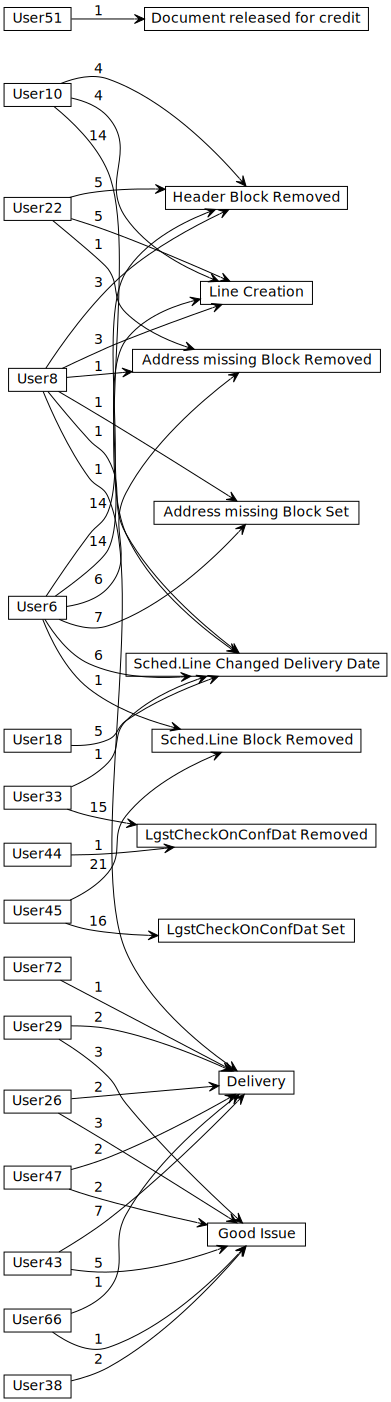

In [62]:

ZA = graphviz.Digraph(format='png')

ZA.attr(rankdir='LR')
ZA.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
ZA.attr('edge', arrowhead='vee', arrowtail='inv',fontname="Sans Bold Italic")

# ZA.attr('node', shape='circle')
# ZA.attr('edge', arrowhead='vee', arrowtail='inv')

max_node = 3
max_case_id = iapu['Weight'].max()
nodelist2 = []
for idx, row in iapu.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        ZA.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        ZA.node(node22)
        nodelist2.append(node22)
        
    ZA.edge(node11, node22, label = weight2)
#             , penwidth=str(int(weight2)/max_case_id*max_node))
# ZA.render('Work distribution', view=True)
ZA

In [63]:
with pd.option_context('display.max_rows', None):
  display(final_df_3.groupby(['User_Type','Activity']).agg(['count']))

Key   Date   User   Role  \
                                            count  count  count  count   
User_Type Activity                                                       
Human     Address missing Block Removed       866    866    866    866   
          Address missing Block Set           842    842    842    842   
          CTR Block Removed                   634    634    634    634   
          CTR Block Set                         1      1      1      1   
          Delivery                          22876  22876  22876  22876   
          Document blocked for credit         263    263    263    263   
          Document released for credit       3366   3366   3366   3366   
          Good Issue                        22876  22876  22876  22876   
          Header Block Removed              20259  20259  20259  20259   
          Header Block Set                    221    221    221    221   
          LgstCheckOnConfDat Removed        31458  31458  31458  31458   
          LgstCheckOnConfDat Set              658    658    658    658   
          Line Creation                     33088  33088  33088  33088   
          Sched.Line Block Removed            509    509    509    509   
          Sched.Line Block Set                  3      3      3      3   
          Sched.Line Changed Delivery Date  10611  10611  10611  10611   
          Special test Block Removed            2      2      2      2   
          Special test Block Set                1      1      1      1   
Robot     Delivery                          24005  24005  24005  24005   
          Good Issue                        24005  24005  24005  24005   
          Header Block Removed                108    108    108    108   
          LgstCheckOnConfDat Set               72     72     72     72   
          Line Creation                       108    108    108    108   

                                           Product_hierarchy NetValue Company  \
                                                       count    count   count   
User_Type Activity                                                              
Human     Address missing Block Removed                  866      866     866   
          Address missing Block Set                      842      842     842   
          CTR Block Removed                              634      634     634   
          CTR Block Set                                    1        1       1   
          Delivery                                     22876    22876   22876   
          Document blocked for credit                    263      263     263   
          Document released for credit                  3366     3366    3366   
          Good Issue                                   22876    22876   22876   
          Header Block Removed                         20259    20259   20259   
          Header Block Set                               221      221     221   
          LgstCheckOnConfDat Removed                   31458    31458   31458   
          LgstCheckOnConfDat Set                         658      658     658   
          Line Creation                                33088    33088   33088   
          Sched.Line Block Removed                       509      509     509   
          Sched.Line Block Set                             3        3       3   
          Sched.Line Changed Delivery Date             10611    10611   10611   
          Special test Block Removed                       2        2       2   
          Special test Block Set                           1        1       1   
Robot     Delivery                                     24005    24005   24005   
          Good Issue                                   24005    24005   24005   
          Header Block Removed                           108      108     108   
          LgstCheckOnConfDat Set                          72       72      72   
          Line Creation                                  108      108     108   

              